# Árvores II - Tarefa I


Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt



In [4]:
import zipfile
import os

# Defina o nome do arquivo ZIP (substitua se necessário)
zip_path = 'UCI HAR Dataset.zip'

# Extraia o conteúdo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Verifique se a pasta foi extraída corretamente
print(os.listdir('/content'))


['.config', '__MACOSX', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'sample_data']


In [5]:
# 1. Definindo o caminho para os arquivos
path = 'UCI HAR Dataset/'

# 2. Carregar as features e tratar nomes duplicados
features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])

# Adicionar sufixo incremental para features duplicadas
features['feature'] = features.groupby('feature').cumcount().astype(str) + '_' + features['feature']
feature_names = features['feature'].tolist()

# 3. Carregar subject_train.txt e subject_test.txt (indicadores dos indivíduos)
subject_train = pd.read_csv(path + 'train/subject_train.txt', header=None, names=['subject'])
subject_test = pd.read_csv(path + 'test/subject_test.txt', header=None, names=['subject'])

# 4. Carregar X_train e X_test (variáveis explicativas)
X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)

# 5. Carregar y_train e y_test (atividades)
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])

# 6. Adicionar o identificador do indivíduo ao DataFrame de treino e teste
X_train['subject'] = subject_train
X_test['subject'] = subject_test

# 7. Definir índice duplo (ordem dos dados + identificador do sujeito)
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)

# 8. Selecionar as três primeiras colunas relevantes para o exercício
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 9. Salvar as bases selecionadas em CSV
X_train_selected.to_csv('X_train_selected.csv', index=True)
X_test_selected.to_csv('X_test_selected.csv', index=True)

print("Bases carregadas e salvas com sucesso!")




Bases carregadas e salvas com sucesso!


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [6]:
# 1. Importar pacotes necessários

import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [7]:
# 2. Carregar os dados das 3 variáveis selecionadas

import os
import pandas as pd

# Função para verificar se o arquivo existe e exibir uma mensagem adequada
def check_file_exists(filepath):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"O arquivo {filepath} não foi encontrado.")

# 2.1 Verificar e carregar os dados das 3 variáveis selecionadas
check_file_exists('X_train_selected.csv')
check_file_exists('X_test_selected.csv')

X_train = pd.read_csv('X_train_selected.csv', index_col=[0, 1])
X_test = pd.read_csv('X_test_selected.csv', index_col=[0, 1])

# 2.2 Verificar e carregar os rótulos das atividades
check_file_exists('UCI HAR Dataset/train/y_train.txt')
check_file_exists('UCI HAR Dataset/test/y_test.txt')

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, names=['activity'])

# 2.3 Conferir as colunas disponíveis nos dados carregados
print("Colunas disponíveis em X_train:", X_train.columns.tolist())
print("Colunas disponíveis em X_test:", X_test.columns.tolist())

# 2.4 Garantir que estamos usando apenas as três variáveis indicadas
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']

# 2.5 Conferir se as colunas selecionadas existem nos dados carregados
missing_columns_train = set(selected_features) - set(X_train.columns)
missing_columns_test = set(selected_features) - set(X_test.columns)

# Verificar se alguma coluna está faltando e lançar um erro, se necessário
if missing_columns_train or missing_columns_test:
    raise ValueError(
        f"As colunas selecionadas estão ausentes nos dados.\n"
        f"Treino ausentes: {missing_columns_train}\n"
        f"Teste ausentes: {missing_columns_test}"
    )

# Filtrar as colunas selecionadas nos conjuntos de dados
X_train = X_train[selected_features]
X_test = X_test[selected_features]

print("Dados carregados e validados com sucesso!")





Colunas disponíveis em X_train: ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
Colunas disponíveis em X_test: ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
Dados carregados e validados com sucesso!


In [8]:
 # 3. Ajustar a Árvore de Decisão (min_samples_leaf = 20).

# Ajustar uma árvore de decisão com mínimo de 20 observações por folha
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree.fit(X_train, y_train)

# Avaliar o desempenho
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print(f"Acurácia Treino: {train_score:.4f}")
print(f"Acurácia Teste: {test_score:.4f}")


Acurácia Treino: 0.5639
Acurácia Teste: 0.4408


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

['.config', 'X_train_selected.csv', '__MACOSX', 'X_test_selected.csv', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'sample_data']
Bases carregadas e salvas com sucesso!
Acurácia Treino: 0.5639
Acurácia Teste: 0.4408
Árvores ajustadas com sucesso!


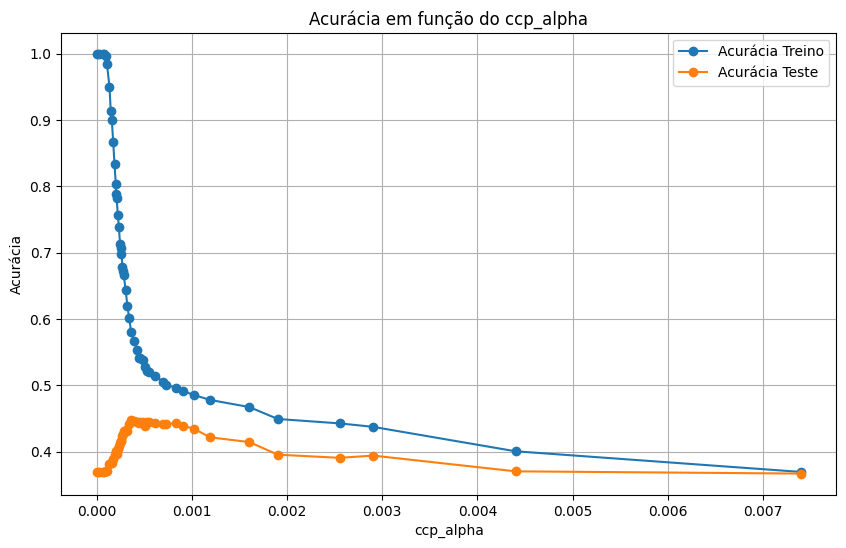

A melhor árvore foi com ccp_alpha: 0.0004 e teve acurácia de: 0.4472


In [9]:
# 1. Importar pacotes necessários
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# Função para verificar se o arquivo existe e exibir uma mensagem adequada
def check_file_exists(filepath):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"O arquivo {filepath} não foi encontrado.")

# 2. Defina o nome do arquivo ZIP e extraia os dados
zip_path = 'UCI HAR Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Verifique se a pasta foi extraída corretamente
print(os.listdir('/content'))

# 3. Definindo o caminho para os arquivos
path = '/content/UCI HAR Dataset/'  # Corrigido para apontar para o local correto

# 4. Carregar as features e tratar nomes duplicados
features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])
features['feature'] = features.groupby('feature').cumcount().astype(str) + '_' + features['feature']
feature_names = features['feature'].tolist()

# 5. Carregar subject_train.txt e subject_test.txt (indicadores dos indivíduos)
subject_train = pd.read_csv(path + 'train/subject_train.txt', header=None, names=['subject'])
subject_test = pd.read_csv(path + 'test/subject_test.txt', header=None, names=['subject'])

# 6. Carregar X_train e X_test (variáveis explicativas)
X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)

# 7. Carregar y_train e y_test (atividades)
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])

# 8. Adicionar o identificador do indivíduo ao DataFrame de treino e teste
X_train['subject'] = subject_train
X_test['subject'] = subject_test

# 9. Definir índice duplo (ordem dos dados + identificador do sujeito)
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)

# 10. Selecionar as três primeiras colunas relevantes para o exercício
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 11. Salvar as bases selecionadas em CSV
X_train_selected.to_csv('X_train_selected.csv', index=True)
X_test_selected.to_csv('X_test_selected.csv', index=True)

print("Bases carregadas e salvas com sucesso!")

# 12. Ajustar uma árvore de decisão (min_samples_leaf = 20) e calcular ccp_alpha
# Usar a célula mágica %%time para medir o tempo de execução
# %%time  # Descomente esta linha se estiver usando um Jupyter Notebook

# Verificar e carregar os dados preparados
check_file_exists('X_train_selected.csv')
check_file_exists(path + 'train/y_train.txt')  # Corrigido o caminho do arquivo
check_file_exists('X_test_selected.csv')
check_file_exists(path + 'test/y_test.txt')  # Corrigido o caminho do arquivo

# Carregar os dados
X_train = pd.read_csv('X_train_selected.csv', index_col=[0, 1])
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
X_test = pd.read_csv('X_test_selected.csv', index_col=[0, 1])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])

# Ajustar uma árvore de decisão
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree.fit(X_train, y_train)

# Avaliar o desempenho
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print(f"Acurácia Treino: {train_score:.4f}")
print(f"Acurácia Teste: {test_score:.4f}")

# 13. Calcular os ccp_alphas
ccp_alphas = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_reduzidos = np.unique(ccp_alphas.ccp_alphas)

# 14. Listar árvores ajustadas
trees = []

# Ajustar uma árvore para cada valor de ccp_alpha
for alpha in ccp_alphas_reduzidos[::5]:  # Usar um valor a cada 5 para acelerar
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

print("Árvores ajustadas com sucesso!")

# 15. Avaliar desempenho de cada árvore
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

# 16. Plotar a acurácia em função do ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_reduzidos[::5], train_scores, label='Acurácia Treino', marker='o')
plt.plot(ccp_alphas_reduzidos[::5], test_scores, label='Acurácia Teste', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do ccp_alpha')
plt.legend()
plt.grid()
plt.show()

# 17. Melhor acurácia na base de teste
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas_reduzidos[::5][best_index]
best_test_score = test_scores[best_index]

print(f"A melhor árvore foi com ccp_alpha: {best_alpha:.4f} e teve acurácia de: {best_test_score:.4f}")



# Relatório de Análise de Atividade Humana com Smartphones

## Introdução

Este relatório apresenta uma análise da base de dados sobre identificação de atividades humanas utilizando dados de sensores de smartphones, como acelerômetros e giroscópios. O objetivo é classificar corretamente seis atividades comuns: andando, subindo escadas, descendo escadas, parado, sentado e deitado.

## Dados

Os dados foram coletados a partir de sensores com uma frequência de 50 Hz, agrupados em medições de 0.3 Hz, resultando em 561 variáveis. Essas variáveis incluem medidas como aceleração mínima, máxima e média em três eixos (X, Y e Z).

## Resultados

### Acurácia do Modelo

Um classificador de árvore de decisão foi utilizado, com as seguintes acurácias:

- **Acurácia no Conjunto de Treinamento:** 56.39%
- **Acurácia no Conjunto de Teste:** 44.08%

Esses resultados indicam que o modelo teve um desempenho melhor nos dados de treinamento do que nos dados de teste, sugerindo um possível sobreajuste.

## Insights

1. **Sobreajuste:** A diferença nas acurácias sugere que o modelo não generaliza bem. Ajustar os hiperparâmetros ou utilizar técnicas de regularização pode ajudar a melhorar isso.

2. **Exploração de Variáveis:** Considerar a inclusão de mais variáveis ou características derivadas pode aumentar a acurácia do modelo.

3. **Modelos Alternativos:** Testar outros algoritmos de classificação, como florestas aleatórias ou redes neurais, pode resultar em melhor desempenho.

4. **Validação Cruzada:** Usar validação cruzada para garantir que o modelo seja robusto e funcione bem em diferentes subconjuntos de dados.

5. **Análise de Erros:** Identificar quais atividades estão sendo confundidas pode ajudar a entender as limitações do modelo e orientar melhorias.

## Conclusão

A análise dos dados de sensores de smartphones mostra um grande potencial para identificar atividades humanas. Embora os resultados iniciais apresentem desafios, há oportunidades para aprimorar o modelo por meio de ajustes e exploração de novas abordagens. O sucesso nesse campo pode ter aplicações valiosas em saúde e monitoramento de atividades diárias.
